In [1]:
# ------------------------------
# IMPORTING LIBRARIES
# ------------------------------

# For numerical operations
import numpy as np

# For data manipulation and analysis
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For handling zip files
import zipfile

---

## **Dataset Overview**

### **NSL-KDD**

The NSL-KDD dataset is an enhancement of the widely acknowledged KDD'99 dataset. It has been curated to address some of the inherent problems of the KDD'99 dataset, making it a more suitable option for modern intrusion detection system experiments.

**Source:** [UCI Machine Learning Repository - KDD Cup 1999 Data](https://archive.ics.uci.edu/dataset/130/kdd+cup+1999+data)

---

In [2]:
# Define the path to the zipped dataset
zip_file_path = 'NSL-KDD.zip'

# Use the `zipfile` library to extract the contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the list of all files in the zip archive
    file_names = zip_ref.namelist()
    
    # Extract all files to the specified directory
    #zip_ref.extractall('DataSetFiles/')

In [3]:
# Display the files names
file_names

['index.html',
 'KDDTest1.jpg',
 'KDDTest-21.arff',
 'KDDTest-21.txt',
 'KDDTest+.arff',
 'KDDTest+.txt',
 'KDDTrain1.jpg',
 'KDDTrain+.arff',
 'KDDTrain+.txt',
 'KDDTrain+_20Percent.arff',
 'KDDTrain+_20Percent.txt']

---

### **Loading the Dataset**

I will load both the training and testing datasets from the extracted files. These datasets will be used for subsequent analysis and model training/testing.

---

In [4]:
# Load the training dataset
df_train = pd.read_csv('DataSetFiles/KDDTrain+.txt', header=None)

# Load the testing dataset
df_test = pd.read_csv('DataSetFiles/KDDTest+.txt', header=None)

---

### **Dataset Attributes Overview**

The NSL-KDD dataset consists of records that have 41 different features. These features capture various aspects of network connections, such as protocol type, service, flag, and byte counts. Additionally, each record has information on the type of attack and its severity level.

The features in each record are ordered as follows:

- **Basic features of individual TCP connections:**  
  `duration`, `protocol_type`, `service`, `flag`, `src_bytes`, `dst_bytes`
  
- **Content features within a connection suggested by domain knowledge:**  
  `land`, `wrong_fragment`, `urgent`, `hot`, `num_failed_logins`, `logged_in`, `num_compromised`, `root_shell`, `su_attempted`, `num_root`, `num_file_creations`, `num_shells`, `num_access_files`, `num_outbound_cmds`
  
- **Traffic features computed using a two-second time window:**  
  `is_host_login`, `is_guest_login`, `count`, `srv_count`, `serror_rate`, `srv_serror_rate`, `rerror_rate`, `srv_rerror_rate`, `same_srv_rate`, `diff_srv_rate`, `srv_diff_host_rate`

- **Traffic features computed with respect to the host:**  
  `dst_host_count`, `dst_host_srv_count`, `dst_host_same_srv_rate`, `dst_host_diff_srv_rate`, `dst_host_same_src_port_rate`, `dst_host_srv_diff_host_rate`, `dst_host_serror_rate`, `dst_host_srv_serror_rate`, `dst_host_rerror_rate`, `dst_host_srv_rerror_rate`

- **Outcome:**  
  `attack`, `level`

---


In [5]:
# To make the dataset more comprehensible, I will assign appropriate column names to each of the features 
# in the dataset. These column names correspond to the attributes discussed in the previous section.
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

In [6]:
# Assigning column names to the training dataset
df_train.columns = columns

# Assigning column names to the testing dataset
df_test.columns = columns

In [7]:
# look at the basic structure of the training dataset. 
# data types of each column, number of non-null values, and memory usage.

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

---

### **Attribute Value Types in the Dataset**

Upon inspection, I can identify that the attributes in our dataset fall into three distinct value types:

1. **Nominal Attributes:** These are categorical attributes that have two or more categories without any kind of order or priority.
   
2. **Binary Attributes:** These attributes take on one of two possible outcomes, typically represented as 0 or 1.

3. **Numeric Attributes:** These are quantitative attributes and represent measurable quantities.

Understanding these types will be crucial when preprocessing the data and selecting appropriate methods for analysis.

---

### **Inspecting Unique Values for each attribute**

To ensure consistency between the training and testing datasets, it's essential to verify if both datasets have the same unique values for categorical attributes. In this section, I will inspect the unique values of the categorical attributes in both datasets.

In [8]:
# Displaying unique values for 'protocol_type' in the training dataset
print("Training dataset 'protocol_type' unique values:", df_train['protocol_type'].unique())

# Displaying unique values for 'protocol_type' in the testing dataset
print("Testing dataset 'protocol_type' unique values:", df_test['protocol_type'].unique())

Training dataset 'protocol_type' unique values: ['tcp' 'udp' 'icmp']
Testing dataset 'protocol_type' unique values: ['tcp' 'icmp' 'udp']


In [9]:
# Displaying unique values for 'service' in the training dataset
print("Training dataset 'service' unique values:", df_train['service'].unique())

# Displaying unique values for 'service' in the testing dataset
print("Testing dataset 'service' unique values:", df_test['service'].unique())

Training dataset 'service' unique values: ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
Testing dataset 'service' unique values: ['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 

Given the large number of unique values in the `service` attribute, listing them all might be overwhelming. Instead, I will compare the count of unique values in both the training and testing datasets. This will help to quickly identify any discrepancies between the datasets.

In [10]:
# Displaying count of unique values for 'service' in the training dataset
print("Number of unique 'service' values in the training dataset:", df_train['service'].nunique())

# Displaying count of unique values for 'service' in the testing dataset
print("Number of unique 'service' values in the testing dataset:", df_test['service'].nunique())

Number of unique 'service' values in the training dataset: 70
Number of unique 'service' values in the testing dataset: 64


In [11]:
# Displaying unique values for 'flag' in the training dataset
print("Training dataset 'flag' unique values:", df_train['flag'].unique())

# Displaying unique values for 'flag' in the testing dataset
print("Testing dataset 'flag' unique values:", df_test['flag'].unique())

Training dataset 'flag' unique values: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
Testing dataset 'flag' unique values: ['REJ' 'SF' 'RSTO' 'S0' 'RSTR' 'SH' 'S3' 'S2' 'S1' 'RSTOS0' 'OTH']


In [12]:
# Displaying unique values for 'attack' in the training dataset
print("Training dataset 'attack' unique values:", df_train['attack'].unique())

# Displaying unique values for 'attack' in the testing dataset
print("Testing dataset 'attack' unique values:", df_test['attack'].unique())

Training dataset 'attack' unique values: ['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']
Testing dataset 'attack' unique values: ['neptune' 'normal' 'saint' 'mscan' 'guess_passwd' 'smurf' 'apache2'
 'satan' 'buffer_overflow' 'back' 'warezmaster' 'snmpgetattack'
 'processtable' 'pod' 'httptunnel' 'nmap' 'ps' 'snmpguess' 'ipsweep'
 'mailbomb' 'portsweep' 'multihop' 'named' 'sendmail' 'loadmodule' 'xterm'
 'worm' 'teardrop' 'rootkit' 'xlock' 'perl' 'land' 'xsnoop' 'sqlattack'
 'ftp_write' 'imap' 'udpstorm' 'phf']


In [13]:
# Displaying count of unique values for 'service' in the training dataset
print("Number of unique 'attack' values in the training dataset:", df_train['attack'].nunique())

# Displaying count of unique values for 'service' in the testing dataset
print("Number of unique 'attack' values in the testing dataset:", df_test['attack'].nunique())

Number of unique 'attack' values in the training dataset: 23
Number of unique 'attack' values in the testing dataset: 38


In [14]:
# Displaying the size of the training dataset
train_size = df_train.shape
print(f"Training dataset size: {train_size[0]} rows and {train_size[1]} columns")

# Displaying the size of the testing dataset
test_size = df_test.shape
print(f"Testing dataset size: {test_size[0]} rows and {test_size[1]} columns")

Training dataset size: 125973 rows and 43 columns
Testing dataset size: 22544 rows and 43 columns


---

### **Merging Training and Testing Datasets**

During the exploratory analysis, I identified discrepancies in some of the categorical attributes between the training and testing datasets. Such discrepancies can lead to issues during data preprocessing, especially when techniques like one-hot encoding are employed. If not addressed, the model might be trained without knowledge of some categories present only in the testing data, potentially affecting its performance.

To address this, I will merge both datasets into a single DataFrame. This ensures that during any preprocessing, all possible categories are considered, guaranteeing consistent transformations across both datasets. 

---


In [15]:
# Merging the training and testing datasets
combined_df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

---

### **Statistical Summary of the Combined Dataset**

After merging the datasets, it's beneficial to obtain a statistical summary of the combined data. This provides insights into the distribution, central tendency, and spread of the numeric attributes across the entire dataset.

In [16]:
combined_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,19.278480
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,2.739757
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


---

### **Attributes Dictionary**

Each record in the dataset is characterized by the following attributes:

- **duration**: Real number
- **protocol_type**: Categorical {'tcp', 'udp', 'icmp'}
- **service**: Categorical {'ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns' 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50' 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp''bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois' 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell' 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier' 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2' 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i' 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest'} 
- **flag**: Categorical { 'SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH'}
- **src_bytes**: Real number
- **dst_bytes**: Real number
- **land**: Binary {'0', '1'}
- **wrong_fragment**: Real number
- **urgent**: Real number
- **hot**: Real number
- **num_failed_logins**: Real number
- **logged_in**: Binary {'0', '1'}
- **num_compromised**: Real number
- **root_shell**: Real number
- **su_attempted**: Real number
- **num_root**: Real number
- **num_file_creations**: Real number
- **num_shells**: Real number
- **num_access_files**: Real number
- **num_outbound_cmds**: Real number
- **is_host_login**: Binary {'0', '1'}
- **is_guest_login**: Binary {'0', '1'}
- **count**: Real number
- **srv_count**: Real number
- **serror_rate**: Real number
- **srv_serror_rate**: Real number
- **rerror_rate**: Real number
- **srv_rerror_rate**: Real number
- **same_srv_rate**: Real number
- **diff_srv_rate**: Real number
- **srv_diff_host_rate**: Real number
- **dst_host_count**: Real number
- **dst_host_srv_count**: Real number
- **dst_host_same_srv_rate**: Real number
- **dst_host_diff_srv_rate**: Real number
- **dst_host_same_src_port_rate**: Real number
- **dst_host_srv_diff_host_rate**: Real number
- **dst_host_serror_rate**: Real number
- **dst_host_srv_serror_rate**: Real number
- **dst_host_rerror_rate**: Real number
- **dst_host_srv_rerror_rate**: Real number
- **attack**: Categorical {'normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap' 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop' 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land' 'loadmodule' 'spy' 'perl' 'saint' 'mscan' 'apache2' 'snmpgetattack' 'processtable' 'httptunnel' 'ps' 'snmpguess' 'mailbomb' 'named' 'sendmail' 'xterm' 'worm' 'xlock' 'xsnoop' 'sqlattack' 'udpstorm'}

---

---

### **Simplifying the 'attack' Attribute**

In real-world streaming scenarios, the immediate priority is typically to detect any anomaly, regardless of its specific type. Detailed classifications can be pursued once an anomaly is detected. This approach aids in rapidly identifying potential threats without getting bogged down by the nuances of each attack type.

Given this context, we will simplify the `attack` attribute in the dataset. Instead of having multiple categories representing various attack types, I will classify entries into two main categories:
- **normal**: Represented by '0'
- **attack**: Represented by '1'

This binary classification will streamline the analysis and make real-time detection more feasible.

---

In [17]:
# Function to modify attack labels
def change_label(data):
    # Replacing specific attack types with the label '1' (indicating an attack)
    data.attack.replace(['neptune','warezclient','ipsweep','portsweep',
                         'teardrop','nmap','satan','smurf','pod','back', 
                         'guess_passwd','ftp_write','multihop','rootkit', 
                         'buffer_overflow','imap','warezmaster','phf','land', 
                         'loadmodule','spy','perl','saint', 'mscan', 'apache2',
                         'snmpgetattack','processtable', 'httptunnel', 'ps',
                         'snmpguess', 'mailbomb','named', 'sendmail', 'xterm',
                         'worm', 'xlock', 'xsnoop','sqlattack',
                         'udpstorm'], 1, inplace=True)
    
    # Replacing 'normal' type with '0' (indicating normal/non-attack)
    data.attack.replace(['normal'], 0, inplace=True)

In [18]:
change_label(combined_df)

In [19]:
combined_df['attack'].unique()

array([0, 1], dtype=int64)

---

### **Visualizing the Distribution of 'Attack' vs. 'Normal'**

To get a better understanding of the distribution of the data, I will visualize the proportion of 'Attack' vs. 'Normal' entries in the combined dataset. A pie chart will provide a clear view of how these two categories are distributed.

---

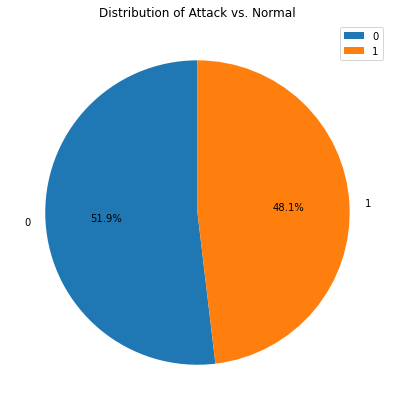

In [20]:
# Calculate the counts for each category
attacks_counts = combined_df['attack'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10,7))
attacks_counts.plot.pie(autopct='%1.1f%%', startangle=90, legend=True)
plt.title('Distribution of Attack vs. Normal')
plt.ylabel('') 
plt.show()

---

### **Visualizing the Distribution of Attack Difficulty Levels**

The dataset provides a 'level' attribute indicating the difficulty level of an attack. To better understand the distribution and prevalence of each difficulty level, I will visualize the counts of each level using a bar chart.

---

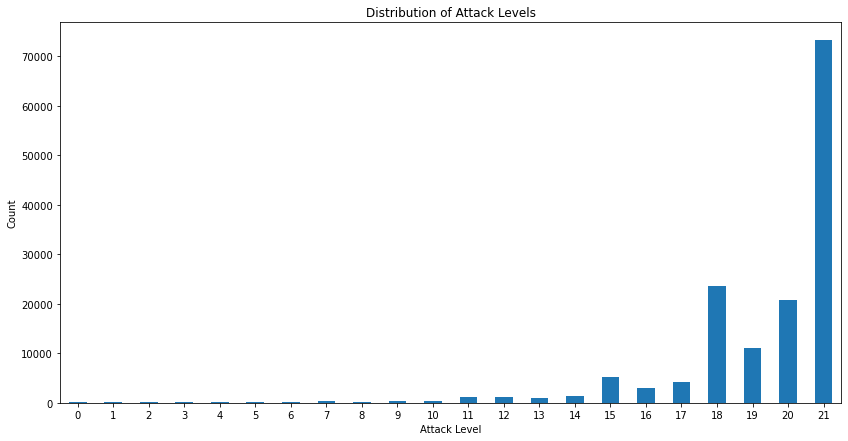

In [21]:
# Calculate the counts for each level
level_counts = combined_df['level'].value_counts().sort_index()

# Plot a bar chart
plt.figure(figsize=(14,7))
level_counts.plot.bar(rot=0)
plt.title('Distribution of Attack Levels')
plt.xlabel('Attack Level')
plt.ylabel('Count')
plt.show()

---

### **Dropping the 'level' Column**

The `level` column in our dataset indicates the difficulty level of an attack. However, in a real-world scenario, this level cannot be determined until after an attack is detected and subsequently classified. Given this, the `level` attribute is not relevant for our model training and testing processes. Therefore, I will remove this column from both the training and testing datasets.

---

In [22]:
# Dropping the 'level' column from the combined dataset
combined_df.drop('level', axis=1, inplace=True)

---

### **Handling Categorical Features**

The NSL-KDD dataset contains several categorical features, including `protocol_type`, `service`, and `flag`. To make these features suitable for machine learning algorithms, they need to be converted into a numerical format. One popular approach for handling categorical data is:

- **One-Hot Encoding**: This method converts categorical values into a format that can be provided to machine learning algorithms to improve model accuracy. It involves creating binary columns for each category or label in the original column. Each of these binary columns represents a unique category and is marked as '0' or '1' based on whether the category is present for a given record.

---

In [23]:
# One-hot encoding categorical columns
combined_df_encoded = pd.get_dummies(combined_df, columns=['protocol_type', 'service', 'flag'])

combined_df_encoded.head()  # Displaying the top rows of the encoded dataframe

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


---

### **Splitting Dataset into Train, Validation, and Streaming Simulation**

I partition the `combined_df_encoded` dataset into three distinct subsets:

- **Training Set**: This subset will be used to train our models.
- **Validation/Test Set**: To evaluate and compare the performance of different neural network architectures.
- **Streaming Simulation Set**: To simulate streaming data and test the model in a streaming environment.

---

In [24]:
from sklearn.model_selection import train_test_split
# Splitting combined_df_encoded into train, validation/test, and streaming_simulation sets
train_df, temp_df = train_test_split(combined_df_encoded, test_size=0.4, random_state=42, stratify=combined_df_encoded['attack'])
val_df, streaming_simulation_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['attack'])

---

### **Splitting Features and Labels**

For the machine learning model training process, it's crucial to segregate the dataset into input features and the target variable. In this section, I will separate our dataset into:

- **Features (X)**: These are the input variables that our model will learn from.
- **Labels/Targets (Y)**: This is the output variable that our model aims to predict.

---

In [25]:
# Separating features and labels for each subset
X_train, Y_train = train_df.drop('attack', axis=1), train_df['attack']
X_val, Y_val = val_df.drop('attack', axis=1), val_df['attack']
X_stream, Y_stream = streaming_simulation_df.drop('attack', axis=1), streaming_simulation_df['attack']

# Displaying the sizes of each subset
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Validation set size: {X_val.shape[0]} rows")
print(f"Streaming simulation set size: {X_stream.shape[0]} rows")

Training set size: 89110 rows
Validation set size: 29703 rows
Streaming simulation set size: 29704 rows


---

### **Normalizing Numerical Features**

Neural networks tend to converge faster and perform better when input features have values ranging between 0 and 1. Features with large magnitudes or differing scales can disproportionately influence the training process and lead to suboptimal results.

One popular approach to address this is:

- **Min-Max Scaling**: This method scales and translates each feature individually such that it's in the range of 0 to 1. 

I will apply Min-Max Scaling to our numerical features to prepare them for neural network training.

---

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns that need to be normalized
numerical_cols = combined_df_encoded.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('attack')  # Removing the 'attack' column as it's our label

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform the validation and streaming simulation datasets using the same scaler
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_stream[numerical_cols] = scaler.transform(X_stream[numerical_cols])

# Display the top rows of the normalized training data
X_train.head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
111718,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
62644,0.000017,1.066363e-06,1.191633e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
108210,0.000000,8.839253e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12678,0.000000,9.678639e-08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51052,0.000000,3.768674e-08,3.297601e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
# Transform the streaming simulation dataset using the same scaler
streaming_simulation_df[numerical_cols] = scaler.transform(streaming_simulation_df[numerical_cols])
streaming_simulation_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
57710,0.0,1.172571e-06,8.144074e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7390,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79843,0.0,2.072771e-07,9.792874e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56960,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68975,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


---

### **Establishing a Baseline Model**

Before diving into more complex modeling techniques, it's prudent to establish a baseline performance. This helps in setting expectations and provides a reference point to compare the effectiveness of more intricate models.

Given that the dataset is fairly balanced, I will use:

- **Logistic Regression**: Despite being a simple linear model, logistic regression can be effective, especially for binary classification tasks. It estimates probabilities for class membership and serves as a straightforward and interpretable baseline.

---

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train, Y_train)

# Predict on the validation set
y_val_pred = logreg.predict(X_val)

# Evaluate the performance
accuracy = accuracy_score(Y_val, y_val_pred)
print(f"Baseline Logistic Regression Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(Y_val, y_val_pred))


Baseline Logistic Regression Accuracy: 0.9569

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     15411
           1       0.97      0.94      0.95     14292

    accuracy                           0.96     29703
   macro avg       0.96      0.96      0.96     29703
weighted avg       0.96      0.96      0.96     29703



In [29]:
def evaluate_model(model, X_val, Y_val):

    # Predicting on the validation data
    y_pred = model.predict(X_val)
    y_pred = [1 if p > 0.5 else 0 for p in y_pred]  # Convert probabilities to class labels
    
    # Calculate accuracy
    loss, accuracy = model.evaluate(X_val, Y_val, verbose=0)
    
    # Print accuracy
    print(f"Validation Accuracy: {accuracy*100:.2f}%")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(Y_val, y_pred))

In [30]:
def plot_training_history(history):

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

In [31]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_val, Y_val, model_name="Model"):

    # Predict probabilities for the positive class
    probas = model.predict(X_val).ravel()

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(Y_val, probas)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

---

### Neural Network Model: Dense Feedforward Architecture

I will construct and train our primary neural network model. Given the nature of the dataset and the task at hand (binary classification), I will employ a dense feedforward neural network, also known as a Multi-Layer Perceptron (MLP).

#### Model Architecture:

1. **Input Layer**: Comprising 122 neurons with a ReLU activation function. The number of neurons matches the number of features in our dataset to ensure that each feature has a corresponding input neuron.
2. **Hidden Layers**: 
    - The first hidden layer has 64 neurons with a ReLU activation function. A dropout layer follows it with a dropout rate of 0.5 to prevent overfitting.
    - The second hidden layer has 32 neurons with a ReLU activation function. A dropout layer with a 0.5 dropout rate again follows this.
3. **Output Layer**: A single neuron with a sigmoid activation function to provide binary classification results (0 or 1).

#### Training Parameters:

- **Optimizer**: Adam optimizer. Adam is an adaptive learning rate optimization algorithm that's been designed specifically for training deep neural networks.
- **Loss Function**: Binary cross-entropy, which is suitable for binary classification problems.
- **Epochs**: The model will be trained for 10 epochs. An epoch is one forward pass and one backward pass of all the training examples.
- **Batch Size**: I have chosen a batch size of 32, which means that the model will update its weights after 32 training samples.

---

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model_1 = Sequential()

# Input layer
model_1.add(Dense(122, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model_1.add(Dropout(0.5))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(32, activation='relu'))

# Output layer
model_1.add(Dense(1, activation='sigmoid'))  # Using sigmoid activation for binary classification

# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model_1.summary()

# Train the model
history = model_1.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=32, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 122)               15006     
                                                                 
 dropout (Dropout)           (None, 122)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                7872      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 24991 (97.62 KB)
Trainable params: 24991 (

In [33]:
evaluate_model(model_1, X_val, Y_val)

929/929 [==============================] - 1s 1ms/step
Validation Accuracy: 98.63%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     15411
           1       0.99      0.98      0.99     14292

    accuracy                           0.99     29703
   macro avg       0.99      0.99      0.99     29703
weighted avg       0.99      0.99      0.99     29703



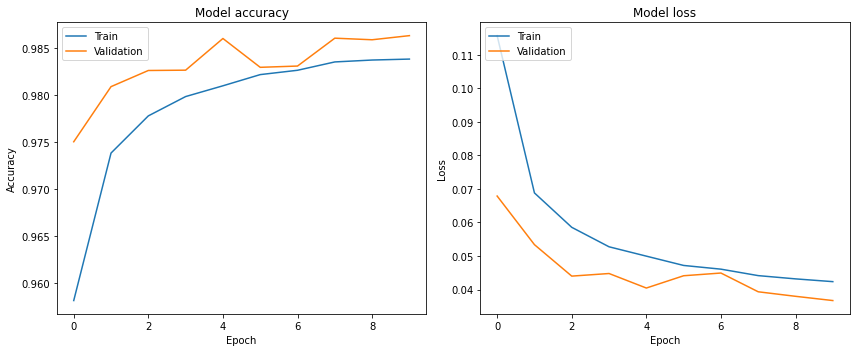

In [34]:
plot_training_history(history)

929/929 [==============================] - 1s 1ms/step


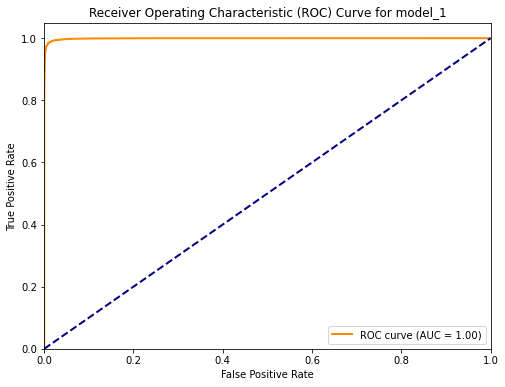

In [35]:
plot_roc_curve(model_1, X_val, Y_val, model_name="model_1")

---

### Neural Network Model 2: Simplified Dense Feedforward Architecture

This model, aim to test how a simpler architecture performs compared to the previous one. By reducing the complexity, we might achieve faster training times and perhaps even better generalization.

#### Model Architecture:

1. **Input Layer**: As with our previous model, this layer comprises 122 neurons with a ReLU activation function, corresponding to each feature in our dataset.
2. **Hidden Layer**: A single hidden layer with 64 neurons and a ReLU activation function. This reduction in complexity compared to the previous model is to test how well a simpler model can perform.
3. **Output Layer**: A single neuron with a sigmoid activation function to provide binary classification results (either 0 or 1).

#### Training Parameters:

- **Optimizer**: Adam optimizer, a popular choice for training neural networks due to its adaptive learning rate capabilities.
- **Loss Function**: Binary cross-entropy, suitable for our binary classification problem.
- **Epochs**: We'll train the model for 10 epochs.
- **Batch Size**: A batch size of 32 has been chosen, meaning the model will update its weights after 32 training samples.

---

In [36]:
# Define the model
model_2 = Sequential()

# Input layer
model_2.add(Dense(122, input_dim=X_train.shape[1], activation='relu'))

# Hidden layer
model_2.add(Dense(64, activation='relu'))

# Output layer
model_2.add(Dense(1, activation='sigmoid'))  # Using sigmoid activation for binary classification

# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model_2.summary()

# Train the model
history_2 = model_2.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 122)               15006     
                                                                 
 dense_5 (Dense)             (None, 64)                7872      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 22943 (89.62 KB)
Trainable params: 22943 (89.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
2785/2785 [==============================] - 8s 3ms/step - loss: 0.0854 - accuracy: 0.9674 - val_loss: 0.0550 - val_accuracy: 0.9804
Epoch 2/10
2785/2785 [==============================] - 7s 2ms/step - loss: 0.0462 - accuracy: 0.9823 - val_loss: 0.0472 - val_accuracy: 0

In [37]:
evaluate_model(model_2, X_val, Y_val)

929/929 [==============================] - 1s 1ms/step
Validation Accuracy: 98.86%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     15411
           1       0.98      0.99      0.99     14292

    accuracy                           0.99     29703
   macro avg       0.99      0.99      0.99     29703
weighted avg       0.99      0.99      0.99     29703



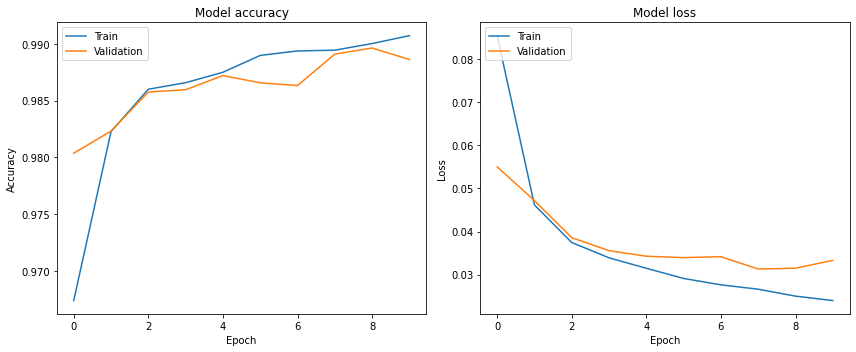

In [38]:
plot_training_history(history_2)

929/929 [==============================] - 1s 1ms/step


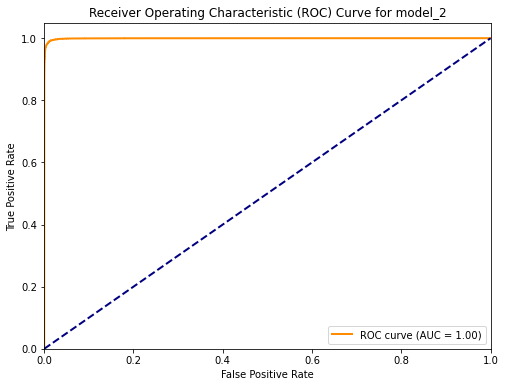

In [39]:
plot_roc_curve(model_2, X_val, Y_val, model_name="model_2")

---

### Neural Network Model 3: Dense Feedforward with Batch Normalization

For this third model, I have introduce batch normalization layers and utilize the `tanh` activation function. Batch normalization can potentially help in stabilizing the learning process and achieving faster convergence. The `tanh` activation function is another popular choice, especially for problems where negative activations are useful.

#### Model Architecture:

1. **Input Layer**: This layer comprises 122 neurons with a `tanh` activation function, matching the number of features in our dataset.
2. **Hidden Layers**: 
    - After the input, we introduce a batch normalization layer.
    - The first hidden layer has 64 neurons with a `tanh` activation function, followed by another batch normalization layer.
    - The second hidden layer consists of 32 neurons, again with a `tanh` activation function.
3. **Output Layer**: The output layer uses a single neuron with a sigmoid activation function, optimal for binary classification tasks.

#### Training Parameters:

- **Optimizer**: For this model, we switch to the `RMSprop` optimizer, which adjusts the learning rate during training.
- **Loss Function**: We continue with binary cross-entropy for our binary classification problem.
- **Epochs**: The model undergoes training for 10 epochs.
- **Batch Size**: We maintain a batch size of 32.

---

In [40]:
from keras.layers import BatchNormalization

# Define the model
model_3 = Sequential()

# Input layer
model_3.add(Dense(128, input_dim=X_train.shape[1], activation='tanh'))

# Hidden layers
model_3.add(BatchNormalization())
model_3.add(Dense(64, activation='tanh'))
model_3.add(BatchNormalization())
model_3.add(Dense(32, activation='tanh'))

# Output layer
model_3.add(Dense(1, activation='sigmoid'))

# Compile the model
model_3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model_3.summary()

# Train the model
history_3 = model_3.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=32)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               15744     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 1)                

In [41]:
evaluate_model(model_3, X_val, Y_val)

929/929 [==============================] - 1s 1ms/step
Validation Accuracy: 98.63%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15411
           1       0.99      0.98      0.99     14292

    accuracy                           0.99     29703
   macro avg       0.99      0.99      0.99     29703
weighted avg       0.99      0.99      0.99     29703



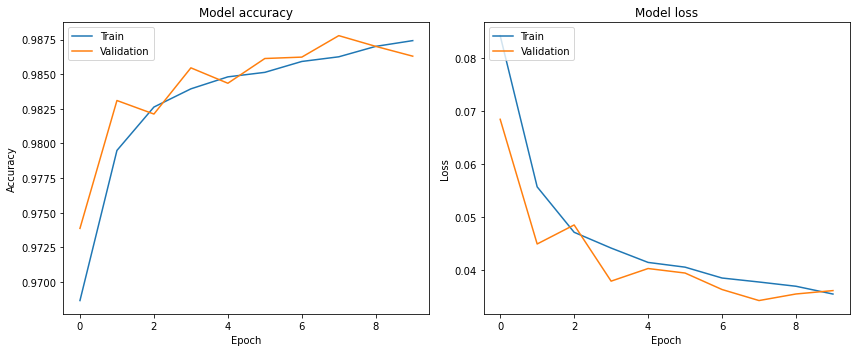

In [42]:
plot_training_history(history_3)

929/929 [==============================] - 1s 1ms/step


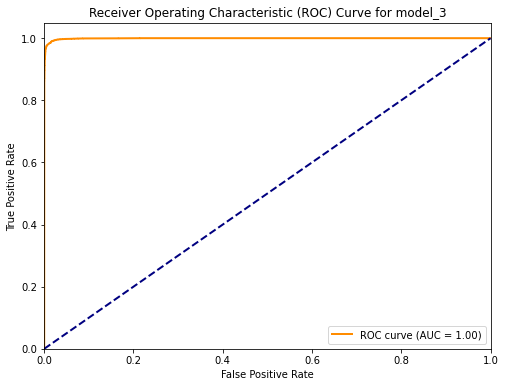

In [43]:
plot_roc_curve(model_3, X_val, Y_val, model_name="model_3")

---

### Neural Network Model 4: Enhanced Feedforward with LeakyReLU and Increased Complexity

The fourth variation, I have introduce a more complex architecture combined with the use of the LeakyReLU activation function. The LeakyReLU activation function allows a small gradient when the unit is not active, which can potentially accelerate convergence and give a more dynamic range to the activations. Also increase the model's depth by adding more dense layers, potentially giving the model more expressive power.

#### Model Architecture:

1. **Input Layer**: This layer comprises 122 neurons with a LeakyReLU activation function.
2. **Hidden Layers**: 
    - The first hidden layer consists of 256 neurons, followed by a LeakyReLU activation.
    - A dropout layer follows with a rate of 0.5 to combat overfitting.
    - The second hidden layer has 128 neurons, followed by another LeakyReLU activation and a dropout layer with a rate of 0.5.
    - The third hidden layer consists of 64 neurons with a standard ReLU activation.
3. **Output Layer**: The output layer uses a single neuron with a sigmoid activation function, suitable for binary classification.

#### Training Parameters:

- **Optimizer**: The Adam optimizer is used for training.
- **Loss Function**: Binary cross-entropy remains our choice for this binary classification problem.
- **Epochs**: The model is trained for 10 epochs.
- **Batch Size**: We use a batch size of 32.

---

In [44]:
from tensorflow.keras.layers import LeakyReLU

# Define the model
model_4 = Sequential()

# Input layer
model_4.add(Dense(122, input_dim=X_train.shape[1]))
model_4.add(LeakyReLU(alpha=0.05))

# Hidden layers
model_4.add(Dense(256))
model_4.add(LeakyReLU(alpha=0.05))
model_4.add(Dropout(0.5))

model_4.add(Dense(128))
model_4.add(LeakyReLU(alpha=0.05))
model_4.add(Dropout(0.5))

model_4.add(Dense(64, activation='relu'))

# Output layer
model_4.add(Dense(1, activation='sigmoid'))

# Compile the model
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model_4.summary()

# Train the model
history_4 = model_4.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=32)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 122)               15006     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 122)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               31488     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 128)              

In [45]:
evaluate_model(model_4, X_val, Y_val)

929/929 [==============================] - 1s 2ms/step
Validation Accuracy: 98.90%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15411
           1       0.99      0.99      0.99     14292

    accuracy                           0.99     29703
   macro avg       0.99      0.99      0.99     29703
weighted avg       0.99      0.99      0.99     29703



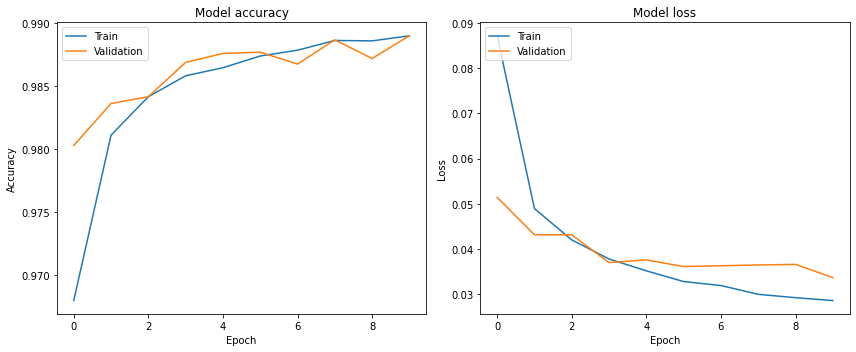

In [46]:
plot_training_history(history_4)

929/929 [==============================] - 1s 1ms/step


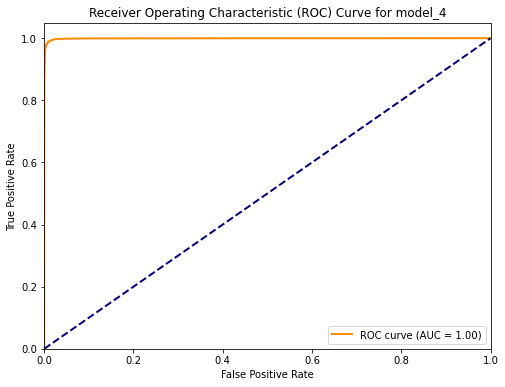

In [47]:
plot_roc_curve(model_4, X_val, Y_val, model_name="model_4")

### Saving the Best Model

Given the evaluations and comparisons of all the models, `model_2` has proven to have the best performance in terms of accuracy and other metrics. It's crucial to save the architecture, weights, and training configuration of the best-performing model to allow for easy deployment, further analysis, or further training in the future.


In [48]:
model_2.save('NeuralNetworkModel.keras')

In [49]:
streaming_simulation_df.to_csv('EncodedStreamingDataset.csv', index=False)